In [ ]:
#pip install pandas_ml

In [ ]:
#pip install ydata-synthetic[streamlit]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf
from ydata_synthetic.utils.cache import cache_file
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf
from sklearn import metrics

In [ ]:
# Importer la base données
data = pd.read_csv('/content/drive/MyDrive/Synthetic Financial Datasets For Fraud Detection.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Les colonnes de la base de données
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Description de la base de donnés
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# Verification des valeurs manquantes
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# La dimension de la base données
data.shape

(6362620, 11)

In [ ]:
# Le nombre de transactions pour chaque type
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
# Le nombre de fraude et non fraude pour chaque type de transaction
cash_out_fraud = data[(data['isFraud'] == 1) & (data['type'] == 'CASH_OUT')]
cash_out_nonFraud = data[(data['isFraud'] == 0) & (data['type'] == 'CASH_OUT')]
payment_fraud = data[(data['isFraud'] == 1) & (data['type'] == 'PAYMENT')]
payment_nonFraud = data[(data['isFraud'] == 0) & (data['type'] == 'PAYMENT')]
cash_in_fraud = data[(data['isFraud'] == 1) & (data['type'] == 'CASH_IN')]
cash_in_nonFraud = data[(data['isFraud'] == 0) & (data['type'] == 'CASH_IN')]
transfer_fraud = data[(data['isFraud'] == 1) & (data['type'] == 'TRANSFER')]
transfer_nonFraud = data[(data['isFraud'] == 0) & (data['type'] == 'TRANSFER')]
debit_fraud = data[(data['isFraud'] == 1) & (data['type'] == 'DEBIT')]
debit_nonFraud = data[(data['isFraud'] == 0) & (data['type'] == 'DEBIT')]

Le nombre totale de données :  6362620
Les non fraudes :  6354407 Les fraudes :  8213
Le taux de la fraude :  0.001290820448180152 Le taux de la non fraude:  0.9987091795518198


<AxesSubplot: ylabel='isFraud'>

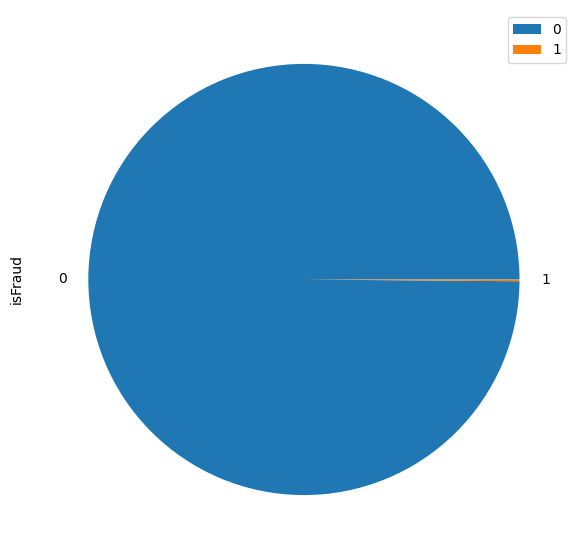

In [ ]:
# Le nombre de fraudes et non fraudes total
fraude  =  data[data['isFraud'] == 1]
non_fraude = data[data['isFraud'] == 0]

print('Le nombre totale de données : ', data.shape[0])
print('Les non fraudes : ', len(non_fraude), 'Les fraudes : ', len(fraude))
print('Le taux de la fraude : ', len(fraude)/len(data), 'Le taux de la non fraude: ', len(non_fraude)/len(data))

# Visualisation
data['isFraud'].value_counts(normalize = True).plot.pie(legend = True, figsize = (7, 7))

# Base de données non équilibrée, l'une des solution c'est d'appliquer des techniques d'augmentation de données pour équilibrer les classes

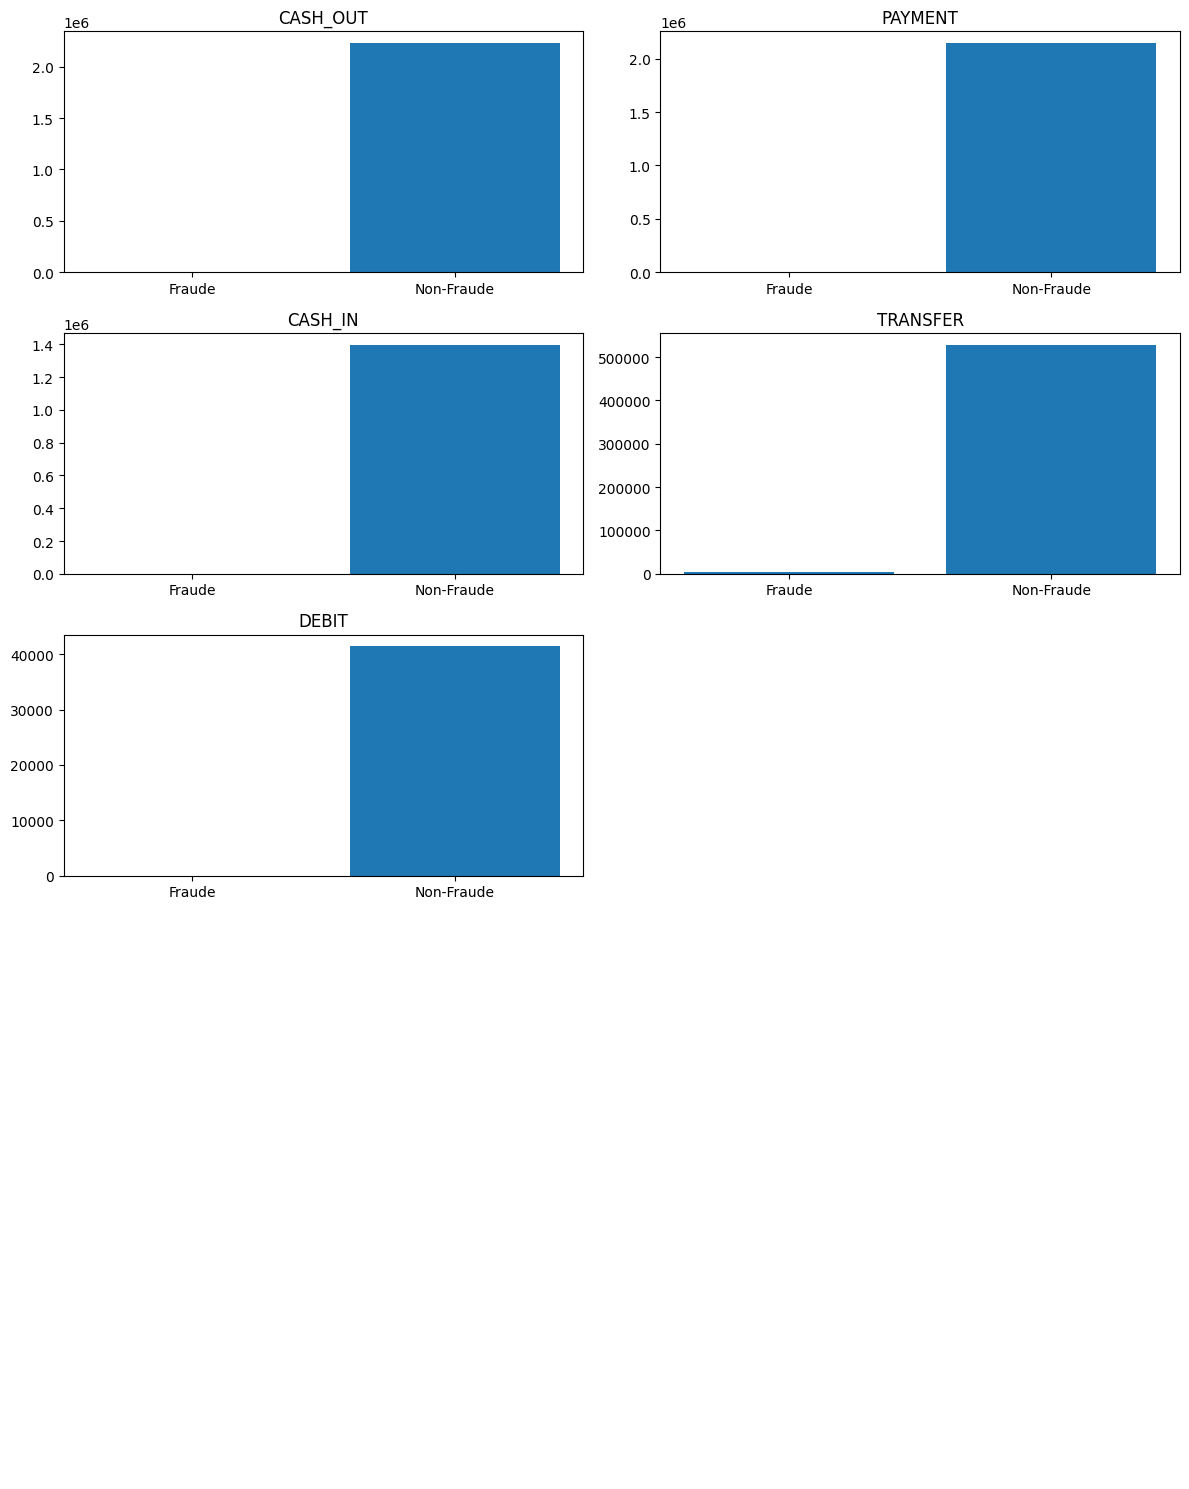

In [ ]:
# Créer une figure et des axes
fig, axs = plt.subplots(5, 2, figsize=(12, 15))

# Tracer les graphiques sur les axes correspondants
axs[0, 0].bar(['Fraude', 'Non-Fraude'], [len(cash_out_fraud), len(cash_out_nonFraud)])
axs[0, 0].set_title('CASH_OUT')

axs[0, 1].bar(['Fraude', 'Non-Fraude'], [len(payment_fraud), len(payment_nonFraud)])
axs[0, 1].set_title('PAYMENT')

axs[1, 0].bar(['Fraude', 'Non-Fraude'], [len(cash_in_fraud), len(cash_in_nonFraud)])
axs[1, 0].set_title('CASH_IN')

axs[1, 1].bar(['Fraude', 'Non-Fraude'], [len(transfer_fraud), len(transfer_nonFraud)])
axs[1, 1].set_title('TRANSFER')

axs[2, 0].bar(['Fraude', 'Non-Fraude'], [len(debit_fraud), len(debit_nonFraud)])
axs[2, 0].set_title('DEBIT')

# Supprimer les axes inutilisés
axs[2, 1].axis('off')
axs[3, 0].axis('off')
axs[3, 1].axis('off')
axs[4, 0].axis('off')
axs[4, 1].axis('off')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [ ]:
# Le nombre de fraudes et non fraudes pour chaque transactions
print('Le nombre de fraudes pour chaque transactions : ')
print('cash_out_fraud :', len(cash_out_fraud))
print('cash_in_fraud :', len(cash_in_fraud))
print('transfer_fraud :', len(transfer_fraud))
print('payment_fraud :', len(payment_fraud))
print('debit_fraud : ', len(debit_fraud))


Le nombre de fraudes pour chaque transactions : 
cash_out_fraud : 4116
cash_in_fraud : 0
transfer_fraud : 4097
payment_fraud : 0
debit_fraud :  0


Transaction types deemed as Fraud: ['TRANSFER', 'CASH_OUT']


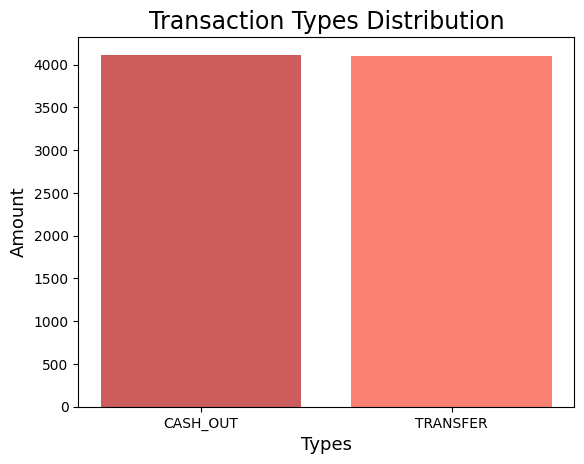

In [ ]:
# Checking which Transaction type were detected as fraud

Types = round(data.loc[(data['isFraud']==1),'type'].value_counts(),2)
print(f"Transaction types deemed as Fraud: {[i for i in  data[data['isFraud']==1]['type'].unique()]}")

plt.bar(x=Types.index, height=Types.values, color=['indianred','salmon'])
for i, v in enumerate(Types.values):
    plt.text(i-0.08,v+3,f'{v}',fontweight='bold',color='white',fontsize=13)
plt.xlabel('Types',fontdict={'fontsize': 13})
plt.ylabel('Amount',fontdict={'fontsize': 13})
plt.title('Transaction Types Distribution', fontdict={'fontsize': 17})
plt.show()

# Transaction deemed as fraud were only found in Transfer and Cashout types.
# The total count of Fraud detected on both Types are similar almost 50:50

In [ ]:
len(data[(data['isFraud'] == 1) & (data['nameDest'].str.contains('M'))])

# Theres no transaction deemd as fraud when the transaction destination are merchants

0

In [ ]:
# Informations sur le transfert et le cash out
t_fraud = data.loc[(data['isFraud'] == 1) & (data['type'] == 'TRANSFER'), ['amount']].describe().T
co_fraud = data.loc[(data['isFraud'] == 1) & (data['type'] == 'CASH_OUT'), ['amount']].describe().T
fraud_types = pd.concat([t_fraud, co_fraud])
fraud_types

# on both types of transaction, it has similar stats, that the median amount of transaction around 440,000 with q1 amount of 125,000

,count,mean,std,min,25%,50%,75%,max
amount,4097.0,1.480892e+06,2.414890e+06,63.8,128417.96,445705.760,1534985.07,10000000.0
amount,4116.0,1.455103e+06,2.393842e+06,0.0,125464.45,435516.905,1500761.03,10000000.0


In [ ]:
# Supprimer les autres types de fraudes
data.drop(data.loc[(data['type'] != 'CASH_OUT') & (data['type'] != 'TRANSFER')].index, inplace = True)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [ ]:
data.shape

(2770409, 11)

In [ ]:
# Mélanger les données
data = shuffle(data)

In [ ]:
# Réinitialiser l'index
data = data.reset_index(drop = True)

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,19,CASH_OUT,71924.89,C1425393687,110323.0,38398.11,C2034281467,2190555.99,2262480.89,0,0
1,345,CASH_OUT,46780.39,C238383545,0.0,0.00,C1976889073,242273.33,289053.72,0,0
2,18,CASH_OUT,110931.13,C72599877,0.0,0.00,C497153622,243599.89,354531.02,0,0
3,229,CASH_OUT,80360.89,C1264866379,26016.0,0.00,C1804491873,0.00,80360.89,0,0
4,402,CASH_OUT,308487.19,C2038225814,0.0,0.00,C1486654808,586628.73,895115.92,0,0


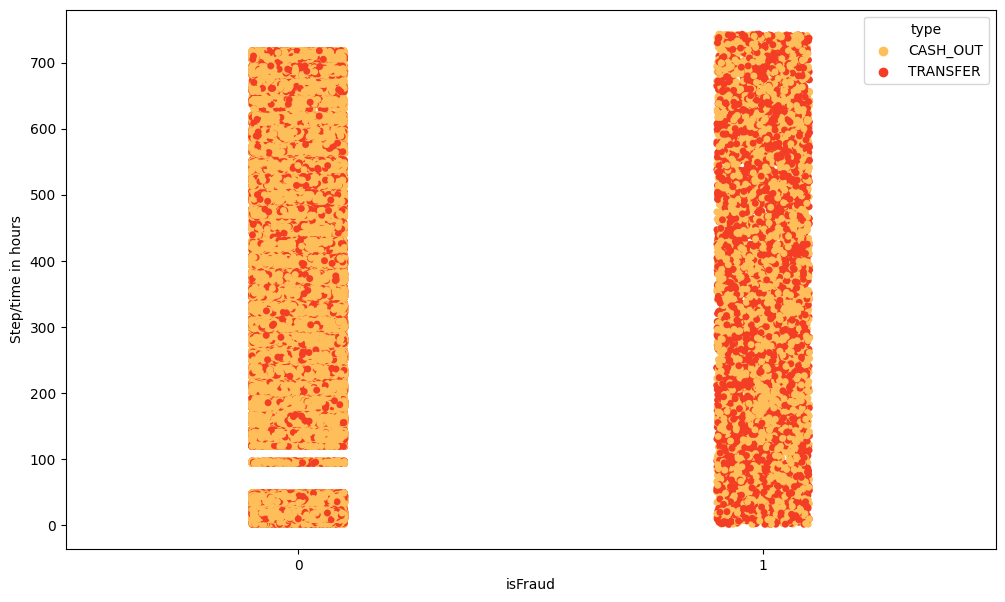

In [ ]:
# Checking the step/time in hours
import seaborn as sns
plt.figure(figsize=(12,7))
sns.stripplot(x= data['isFraud'], y =data['step'], hue =data['type'], palette= 'YlOrRd');
plt.ylabel('Step/time in hours')
plt.show()

# Le graphique ci-dessous montre que les transactions considérées comme frauduleuses sont réparties uniformément entre la première et la dernière heure.
# Alors que les transactions non frauduleuses en dessous de 100 heures semblent faire une pause.
# le nombre de transactions de type Encaissement est supérieur à celui des transactions de type Transfert pour les transactions non frauduleuses,
# alors que pour les transactions frauduleuses, les types de ces deux transactions se répartissent de manière égale.

In [ ]:
# Le nombre de transactions pour les transactions TRANSFER et CASH_OUT
data['type'].value_counts()

CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

In [ ]:
# Faire une copie de la base de données
new_data = data.copy()
new_data.shape

(2770409, 11)

In [ ]:
# Encoder les types de transactions 0 et 1
new_data['type'] = new_data['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [ ]:
# Verification des nouvelle valeurs de ttpes de transactions
new_data['type'].value_counts()

1    2237500
0     532909
Name: type, dtype: int64

In [ ]:
new_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,19,1,71924.89,C1425393687,110323.0,38398.11,C2034281467,2190555.99,2262480.89,0,0
1,345,1,46780.39,C238383545,0.0,0.00,C1976889073,242273.33,289053.72,0,0
2,18,1,110931.13,C72599877,0.0,0.00,C497153622,243599.89,354531.02,0,0
3,229,1,80360.89,C1264866379,26016.0,0.00,C1804491873,0.00,80360.89,0,0
4,402,1,308487.19,C2038225814,0.0,0.00,C1486654808,586628.73,895115.92,0,0
5,326,1,4645.46,C173826582,0.0,0.00,C78576636,3127976.13,3132621.59,0,0
6,259,1,31904.78,C1618827461,0.0,0.00,C817128705,168112.37,200017.15,0,0
7,225,1,321758.98,C1106029603,87354.0,0.00,C1838923302,101085.91,422844.89,0,0
8,399,1,445980.12,C1092512016,201771.0,0.00,C1957077709,236923.03,682903.14,0,0
9,140,1,112574.38,C991807663,2098.0,0.00,C1608267094,58252.07,170826.45,0,0


In [ ]:
# On prend que les données de la classe fraude
fraud_data = new_data[(new_data['isFraud'] == 1)]
print('La dimension du Dataset fraud_data', fraud_data.shape)
print(fraud_data['isFraud'].value_counts())
print(fraud_data['type'].value_counts())

La dimension du Dataset fraud_data (8213, 11)
1    8213
Name: isFraud, dtype: int64
1    4116
0    4097
Name: type, dtype: int64


In [ ]:
# Prendre que les transactions de type CASH OUT
cash_out_data = fraud_data[fraud_data['type'] == 1]
cash_out_data = cash_out_data.reset_index(drop = True)
print(cash_out_data.shape)

(4116, 11)


In [ ]:
cash_out_data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,691,1,473086.28,C258022206,473086.28,0.0,C1286966923,22270848.04,22743934.32,1,0
1,15,1,696763.08,C725915377,696763.08,0.0,C1656726101,366114.58,1347073.81,1,0
2,406,1,4737833.35,C450630495,4737833.35,0.0,C1565281210,11580904.90,16318738.25,1,0
3,90,1,134515.36,C1389046188,134515.36,0.0,C257288692,29488.06,164003.41,1,0
4,462,1,151994.59,C1333813455,151994.59,0.0,C1158263027,0.00,151994.59,1,0


In [ ]:
#result = cash_out_data[cash_out_data['nameOrig'].str.contains('C', case=False)]
#result.shape

In [ ]:
# Encoder la lettre 'C' dans la colonne 'Colonne1' de la DataFrame
# cash_out_data['nameOrig'] = cash_out_data['nameOrig'].str.replace('C', '3')

In [ ]:
#cash_out_data.head(25)

In [ ]:
#result = cash_out_data[cash_out_data['nameDest'].str.contains('C', case=False)]
#result.shape

In [ ]:
# Encoder la lettre 'C' dans la colonne 'Colonne1' de la DataFrame
#cash_out_data['nameDest'] = cash_out_data['nameDest'].str.replace('C', '3')

In [ ]:
cash_out_data = cash_out_data.drop(columns = ['nameOrig','nameDest', 'step'])

In [ ]:
cash_out_data.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,473086.28,473086.28,0.0,22270848.04,22743934.32,1,0
1,1,696763.08,696763.08,0.0,366114.58,1347073.81,1,0
2,1,4737833.35,4737833.35,0.0,11580904.90,16318738.25,1,0
3,1,134515.36,134515.36,0.0,29488.06,164003.41,1,0
4,1,151994.59,151994.59,0.0,0.00,151994.59,1,0


In [ ]:
# L'argument remainder="passthrough" indique que les colonnes qui ne sont pas spécifiées dans la liste des transformations doivent être conservées sans aucun traitement. Cela permet de garder les autres colonnes inchangées dans les données transformées.
ct = ColumnTransformer([("scaling", StandardScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])], remainder="passthrough")
cash_out_data=ct.fit_transform(cash_out_data)
cash_out_data = pd.DataFrame(cash_out_data)

In [ ]:
cash_out_data.head(5)

,0,1,2,3,4,5,6,7
0,-0.410276,-0.409647,-0.015589,4.556195,3.868916,1.0,1.0,0.0
1,-0.316826,-0.316223,-0.015589,-0.154584,-0.230374,1.0,1.0,0.0
2,1.371490,1.371625,-0.015589,2.257242,2.637953,1.0,1.0,0.0
3,-0.551727,-0.551059,-0.015589,-0.226978,-0.457031,1.0,1.0,0.0
4,-0.544425,-0.543758,-0.015589,-0.233320,-0.459332,1.0,1.0,0.0


In [ ]:
sorted_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type', 'isFraud', 'isFlaggedFraud']
cash_out_data.columns = sorted_cols

In [ ]:
cash_out_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud,isFlaggedFraud
0,-0.410276,-0.409647,-0.015589,4.556195,3.868916,1.0,1.0,0.0
1,-0.316826,-0.316223,-0.015589,-0.154584,-0.230374,1.0,1.0,0.0
2,1.371490,1.371625,-0.015589,2.257242,2.637953,1.0,1.0,0.0
3,-0.551727,-0.551059,-0.015589,-0.226978,-0.457031,1.0,1.0,0.0
4,-0.544425,-0.543758,-0.015589,-0.233320,-0.459332,1.0,1.0,0.0


In [ ]:
# Reordonner les colonnes
#new_order = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
new_order = [ 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type']

# Conversion des données de la colonne Class en int
cash_out_data['isFraud'] = cash_out_data['isFraud'].astype(int)
cash_out_data['isFlaggedFraud'] = cash_out_data['isFlaggedFraud'].astype(int)
cash_out_data['type'] = cash_out_data['type'].astype(int)
cash_out_data = cash_out_data.reindex(columns=new_order)

In [ ]:
cash_out_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.410276,-0.409647,-0.015589,4.556195,3.868916,1,0,1
1,-0.316826,-0.316223,-0.015589,-0.154584,-0.230374,1,0,1
2,1.371490,1.371625,-0.015589,2.257242,2.637953,1,0,1
3,-0.551727,-0.551059,-0.015589,-0.226978,-0.457031,1,0,1
4,-0.544425,-0.543758,-0.015589,-0.233320,-0.459332,1,0,1


In [ ]:
#cash_out_num_cols = list(data.columns[(data.columns != 'type') & (data.columns != 'isFraud')])
cash_out_num_cols = list(data.columns[ (data.columns != 'step') &(data.columns != 'nameOrig') & (data.columns != 'nameDest') & (data.columns != 'type')])
cash_out_num_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

# **transfer_data**

In [ ]:
# Prendre que les transactions de type TRANSFER
transfer_data = fraud_data[fraud_data['type'] == 0]
print(transfer_data.shape)

(4097, 11)


In [ ]:
transfer_data['isFraud'].value_counts()

1    4097
Name: isFraud, dtype: int64

In [ ]:
transfer_data = transfer_data.drop(columns = ['nameOrig', 'nameDest', 'step'])
transfer_data.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1031,0,326394.80,326394.80,0.0,0.0,0.0,1,0
1219,0,6168077.60,6168077.60,0.0,0.0,0.0,1,0
2141,0,277048.48,277048.48,0.0,0.0,0.0,1,0
3335,0,6085.30,6085.30,0.0,0.0,0.0,1,0
4358,0,1764326.19,1764326.19,0.0,0.0,0.0,1,0


In [ ]:
# L'argument remainder="passthrough" indique que les colonnes qui ne sont pas spécifiées dans la liste des transformations doivent être conservées sans aucun traitement. Cela permet de garder les autres colonnes inchangées dans les données transformées.
# L'argument remainder="passthrough" indique que les colonnes qui ne sont pas spécifiées dans la liste des transformations doivent être conservées sans aucun traitement. Cela permet de garder les autres colonnes inchangées dans les données transformées.
ct = ColumnTransformer([("scaling", StandardScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])], remainder="passthrough")
transfer_data=ct.fit_transform(transfer_data)
transfer_data = pd.DataFrame(transfer_data)

In [ ]:
transfer_data.head(5)

,0,1,2,3,4,5,6,7
0,-0.478133,-0.345166,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
1,1.941189,0.981398,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
2,-0.498569,-0.356372,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
3,-0.610788,-0.417904,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
4,0.117384,-0.018632,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0


In [ ]:
sorted_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type', 'isFraud', 'isFlaggedFraud']
transfer_data.columns = sorted_cols

In [ ]:
transfer_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type,isFraud,isFlaggedFraud
0,-0.478133,-0.345166,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
1,1.941189,0.981398,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
2,-0.498569,-0.356372,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
3,-0.610788,-0.417904,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0
4,0.117384,-0.018632,-0.139232,-0.026864,-0.050272,0.0,1.0,0.0


In [ ]:
# Reordonner les colonnes
#new_order = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
new_order = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type']

# Conversion des données de la colonne Class en int
transfer_data['isFraud'] = transfer_data['isFraud'].astype(int)
transfer_data['isFlaggedFraud'] = transfer_data['isFlaggedFraud'].astype(int)
transfer_data['type'] = transfer_data['type'].astype(int)
transfer_data = transfer_data.reindex(columns=new_order)

In [ ]:
transfer_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.478133,-0.345166,-0.139232,-0.026864,-0.050272,1,0,0
1,1.941189,0.981398,-0.139232,-0.026864,-0.050272,1,0,0
2,-0.498569,-0.356372,-0.139232,-0.026864,-0.050272,1,0,0
3,-0.610788,-0.417904,-0.139232,-0.026864,-0.050272,1,0,0
4,0.117384,-0.018632,-0.139232,-0.026864,-0.050272,1,0,0


In [ ]:
transfer_data['type'].value_counts()

0    4097
Name: type, dtype: int64

In [ ]:
transfer_data['isFraud'].value_counts()

1    4097
Name: isFraud, dtype: int64

In [ ]:
#cash_out_num_cols = list(data.columns[(data.columns != 'type') & (data.columns != 'isFraud')])
transfer_num_cols = list(data.columns[ (data.columns != 'step') &(data.columns != 'nameOrig') & (data.columns != 'nameDest') & (data.columns != 'type')])
transfer_num_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

# **Génération des données synthetiques et entrainement du CGAN**

# **1. Génération des données de fraude pour la transaction cash out**

In [ ]:
# Définir les parametres du CGAN
noise_dim = 32
dim = 128
batch_size = 128
beta_1 = 0.5
beta_2 = 0.9

log_step = 100
epochs = 10 + 1
learning_rate = 5e-4
model_dir = '/content/cache'
cat_cols = []

In [ ]:
gan_args = ModelParameters(batch_size = batch_size,
                           lr = learning_rate,
                           betas = (beta_1, beta_2),
                           noise_dim = noise_dim,
                           layers_dim = dim)

train_args =  TrainParameters(epochs = epochs,
                              cache_prefix = '',
                              sample_interval = log_step,
                              label_dim = -1,
                              labels = (0, 1))

In [ ]:
# Initialisez le GAN conditionnel en fournissant lindex de la colonne détiquette comme lun des arguments
synth = RegularSynthesizer(modelname='cgan', model_parameters = gan_args)

In [ ]:
cash_out_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.410276,-0.409647,-0.015589,4.556195,3.868916,1,0,1
1,-0.316826,-0.316223,-0.015589,-0.154584,-0.230374,1,0,1
2,1.371490,1.371625,-0.015589,2.257242,2.637953,1,0,1
3,-0.551727,-0.551059,-0.015589,-0.226978,-0.457031,1,0,1
4,-0.544425,-0.543758,-0.015589,-0.233320,-0.459332,1,0,1


In [ ]:
cash_out_data.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type'],
      dtype='object')

In [ ]:
synth.fit(data = cash_out_data, train_arguments = train_args, num_cols = cash_out_num_cols, label_cols = ['type'], cat_cols=cat_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  9%|▉         | 1/11 [00:09<01:31,  9.11s/it]

0 [D loss: 0.682451, acc.: 58.59%] [G loss: 0.732880]


 18%|█▊        | 2/11 [00:16<01:14,  8.24s/it]

1 [D loss: 0.667766, acc.: 82.03%] [G loss: 0.748335]


 27%|██▋       | 3/11 [00:22<00:56,  7.03s/it]

2 [D loss: 0.735963, acc.: 41.41%] [G loss: 0.690936]


 36%|███▋      | 4/11 [00:28<00:46,  6.63s/it]

3 [D loss: 0.669218, acc.: 55.08%] [G loss: 0.751808]


 45%|████▌     | 5/11 [00:35<00:41,  6.98s/it]

4 [D loss: 0.318624, acc.: 94.53%] [G loss: 2.056940]


 55%|█████▍    | 6/11 [00:42<00:33,  6.80s/it]

5 [D loss: 0.667073, acc.: 50.78%] [G loss: 0.752507]


 64%|██████▎   | 7/11 [00:48<00:26,  6.56s/it]

6 [D loss: 0.879398, acc.: 35.55%] [G loss: 0.919482]


 73%|███████▎  | 8/11 [00:57<00:21,  7.30s/it]

7 [D loss: 0.657821, acc.: 49.61%] [G loss: 0.757257]


 82%|████████▏ | 9/11 [01:04<00:14,  7.29s/it]

8 [D loss: 1.336089, acc.: 10.94%] [G loss: 0.486878]


 91%|█████████ | 10/11 [01:12<00:07,  7.37s/it]

9 [D loss: 0.653489, acc.: 46.48%] [G loss: 0.767302]


100%|██████████| 11/11 [01:20<00:00,  7.35s/it]

10 [D loss: 0.823650, acc.: 41.80%] [G loss: 0.801885]


In [ ]:
#Saving the synthesizer
synth.save('creditcard_cgan_model.pkl')

In [ ]:
#Loading the synthesizer
synthesizer = RegularSynthesizer.load('/content/creditcard_cgan_model.pkl')

In [ ]:
#Sampling from the synthesizer
#cond_array = pd.DataFrame(100000*[1], columns=['isFraud'])
cond_array = pd.DataFrame(200000*[1], columns=['type'])

In [ ]:
# Synthesizer samples are returned in the original format (inverse_transform of internal processing already took place)
cash_out_synth_data = synthesizer.sample(cond_array)

In [ ]:
print(cash_out_synth_data.shape)
print(cash_out_synth_data['isFraud'].value_counts())
print(cash_out_synth_data['type'].value_counts())
cash_out_synth_data = shuffle(cash_out_synth_data)

(200000, 8)
0    120286
1     79714
Name: isFraud, dtype: int64
1    200000
Name: type, dtype: int64


In [ ]:
cash_out_synth_data = cash_out_synth_data[cash_out_synth_data['isFraud'] == 1]

In [ ]:
cash_out_synth_data.head(35)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
74643,-0.334304,-0.360945,0.528321,-0.701720,-0.661932,1,0,1
155871,-0.485397,-0.468417,-0.585391,-0.590316,-0.564087,1,0,1
115858,0.485619,0.569540,-0.032078,-1.235038,-0.445088,1,0,1
85406,-0.017477,0.041107,0.216363,-0.667738,-0.489699,1,0,1
43118,0.181393,0.207017,0.778030,-0.262435,0.042701,1,0,1
83516,0.232821,0.295775,-0.165352,0.229807,-0.169054,1,0,1
71095,2.993093,3.095897,-0.404715,-1.230526,1.316789,1,0,1
89472,2.838322,2.809941,1.961829,-1.785266,2.084683,1,0,1
189531,0.178786,0.174122,-0.495739,-0.587955,-0.782334,1,0,1
88833,-0.175144,-0.141102,-0.582560,-0.508257,-0.253360,1,0,1


In [ ]:
cash_out_synth_data.shape

(79714, 8)

In [ ]:
cash_out_synth_data = cash_out_synth_data.reset_index(drop = True)

In [ ]:
# Sauvegarder le DataFrame en tant que fichier CSV
cash_out_synth_data.to_csv('cash_out_synth_data.csv', index=False)

# **2. Génération de données synthétiques de fraude pour la transaction Transfer**

In [ ]:
# Définir les parametres du CGAN
noise_dim = 32
dim = 128
batch_size = 128
beta_1 = 0.5
beta_2 = 0.9

log_step = 100
epochs = 10 + 1
learning_rate = 5e-4
model_dir = '/content/cache2'
cat_cols = []

In [ ]:
gan_args = ModelParameters(batch_size = batch_size,
                           lr = learning_rate,
                           betas = (beta_1, beta_2),
                           noise_dim = noise_dim,
                           layers_dim = dim)

train_args =  TrainParameters(epochs = epochs,
                              cache_prefix = '',
                              sample_interval = log_step,
                              label_dim = -1,
                              labels = (0, 1))

In [ ]:
# Initialisez le GAN conditionnel en fournissant lindex de la colonne détiquette comme lun des arguments
synth = RegularSynthesizer(modelname='cgan', model_parameters = gan_args)

In [ ]:
synth.fit(data = transfer_data, train_arguments = train_args, num_cols = transfer_num_cols, label_cols = ['type'], cat_cols=cat_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  9%|▉         | 1/11 [00:07<01:13,  7.35s/it]

0 [D loss: 0.681889, acc.: 62.11%] [G loss: 0.702986]


 18%|█▊        | 2/11 [00:13<01:00,  6.67s/it]

1 [D loss: 0.680336, acc.: 49.22%] [G loss: 0.676376]


 27%|██▋       | 3/11 [00:24<01:08,  8.51s/it]

2 [D loss: 0.652131, acc.: 68.75%] [G loss: 0.742692]


 36%|███▋      | 4/11 [00:35<01:07,  9.67s/it]

3 [D loss: 0.674400, acc.: 48.44%] [G loss: 0.736654]


 45%|████▌     | 5/11 [00:48<01:04, 10.83s/it]

4 [D loss: 0.848305, acc.: 33.98%] [G loss: 0.551714]


 55%|█████▍    | 6/11 [00:58<00:53, 10.61s/it]

5 [D loss: 0.369209, acc.: 91.02%] [G loss: 1.590431]


 64%|██████▎   | 7/11 [01:06<00:39,  9.77s/it]

6 [D loss: 0.638944, acc.: 63.28%] [G loss: 0.871110]


 73%|███████▎  | 8/11 [01:14<00:27,  9.15s/it]

7 [D loss: 0.869269, acc.: 30.86%] [G loss: 0.613871]


 82%|████████▏ | 9/11 [01:20<00:16,  8.06s/it]

8 [D loss: 0.610067, acc.: 64.06%] [G loss: 0.834193]


 91%|█████████ | 10/11 [01:26<00:07,  7.42s/it]

9 [D loss: 0.711807, acc.: 49.61%] [G loss: 0.845792]


100%|██████████| 11/11 [01:34<00:00,  8.56s/it]

10 [D loss: 0.635712, acc.: 61.33%] [G loss: 0.967660]


In [ ]:
#Saving the synthesizer
synth.save('creditcard_cgan_model2.pkl')

In [ ]:
#Loading the synthesizer
synthesizer2 = RegularSynthesizer.load('/content/creditcard_cgan_model2.pkl')

In [ ]:
#Sampling from the synthesizer
#cond_array = pd.DataFrame(100000*[1], columns=['isFraud'])
cond_array2 = pd.DataFrame(200000*[0], columns=['type'])

In [ ]:
# Synthesizer samples are returned in the original format (inverse_transform of internal processing already took place)
transfer_synth_data = synthesizer.sample(cond_array2)

In [ ]:
print(transfer_synth_data.shape)
print(transfer_synth_data['isFraud'].value_counts())
print(transfer_synth_data['type'].value_counts())
transfer_synth_data = shuffle(transfer_synth_data)

(200000, 8)
1    110972
0     89028
Name: isFraud, dtype: int64
0    200000
Name: type, dtype: int64


In [ ]:
transfer_synth_data = transfer_synth_data[transfer_synth_data['isFraud'] == 1]

In [ ]:
transfer_synth_data.head(35)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
106320,2.223319,2.306165,0.392882,-1.376706,2.241659,1,0,0
92314,3.425585,3.524901,1.467957,-1.310040,1.654824,1,0,0
152030,2.093604,2.094638,0.545350,-0.659901,1.815425,1,0,0
171649,1.019377,1.050816,1.029744,-0.727045,-0.096002,1,0,0
87008,3.409169,3.475264,0.200774,-1.111296,1.818007,1,0,0
56642,1.830866,1.996977,-1.031436,-0.653054,0.740298,1,0,0
185579,0.723161,0.821150,0.200757,-0.669987,-0.205115,1,0,0
100707,0.767538,0.906252,-0.035630,-1.550241,1.053668,1,0,0
30401,2.752737,2.791667,-0.260166,-1.349497,0.641475,1,0,0
145946,-0.194282,-0.164409,0.782161,0.394055,-0.098441,1,0,0


In [ ]:
transfer_synth_data = transfer_synth_data.reset_index(drop = True)

In [ ]:
# Sauvegarder le DataFrame en tant que fichier CSV
transfer_synth_data.to_csv('transfer_synth_data.csv', index=False)

# **Détails sur les deux base de données générées**

In [ ]:
print('La dimension de la BDD synth de transfer', transfer_synth_data.shape)
print('La dimension de la BDD synth de cash out', cash_out_synth_data.shape)
print('-------------------------------------------------------------------------------')
print('Détails sur la base de données TRNSFER_SYNTH_DATA')
print('Details sur la BDD transfer', transfer_synth_data['isFraud'].value_counts())
print('Details sur la BDD transfer', transfer_synth_data['type'].value_counts())
print('-------------------------------------------------------------------------------')
print('Détails sur la base de données CASH_OUT_SYNTH_DATA')
print('Details sur la BDD cash_out_synth_data', cash_out_synth_data['isFraud'].value_counts())
print('Details sur la BDD cash_out_synth_data', cash_out_synth_data['type'].value_counts())

La dimension de la BDD synth de transfer (110972, 8)
La dimension de la BDD synth de cash out (79714, 8)
-------------------------------------------------------------------------------
Détails sur la base de données TRNSFER_SYNTH_DATA
Details sur la BDD transfer 1    110972
Name: isFraud, dtype: int64
Details sur la BDD transfer 0    110972
Name: type, dtype: int64
-------------------------------------------------------------------------------
Détails sur la base de données CASH_OUT_SYNTH_DATA
Details sur la BDD cash_out_synth_data 1    79714
Name: isFraud, dtype: int64
Details sur la BDD cash_out_synth_data 1    79714
Name: type, dtype: int64


In [ ]:
transfer_nonFraud.shape

(528812, 11)

In [ ]:
transfer_nonFraud['type'].value_counts()

TRANSFER    528812
Name: type, dtype: int64

In [ ]:
#   Modification de la dataframe transfer_nonFraud
transfer_nonFraud = transfer_nonFraud.drop(columns = ['nameOrig', 'nameDest', 'step'])
ct = ColumnTransformer([("scaling", StandardScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])], remainder="passthrough")
transfer_nonFraud=ct.fit_transform(transfer_nonFraud)
transfer_nonFraud = pd.DataFrame(transfer_nonFraud)
sorted_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type', 'isFraud', 'isFlaggedFraud']
transfer_nonFraud.columns = sorted_cols
# Reordonner les colonnes
#new_order = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
new_order = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Encoder les types de transactions 0 et 1
transfer_nonFraud['type'] = transfer_nonFraud['type'].map({'TRANSFER': 0})

# Conversion des données de la colonne Class en int
transfer_nonFraud['isFraud'] = transfer_nonFraud['isFraud'].astype(int)
transfer_nonFraud['isFlaggedFraud'] = transfer_nonFraud['isFlaggedFraud'].astype(int)
transfer_nonFraud['type'] = transfer_nonFraud['type'].astype(int)
transfer_nonFraud = transfer_nonFraud.reindex(columns=new_order)

In [ ]:
transfer_nonFraud = transfer_nonFraud.sample(100000, replace = True)

In [ ]:
# Modification de la dataframe cash_out_nonFraud

cash_out_nonFraud = cash_out_nonFraud.drop(columns = ['nameOrig', 'nameDest', 'step'])
ct = ColumnTransformer([("scaling", StandardScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])], remainder="passthrough")
cash_out_nonFraud=ct.fit_transform(cash_out_nonFraud)
cash_out_nonFraud = pd.DataFrame(cash_out_nonFraud)
sorted_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type', 'isFraud', 'isFlaggedFraud']
cash_out_nonFraud.columns = sorted_cols
# Reordonner les colonnes
#new_order = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
new_order = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Encoder les types de transactions 0 et 1
cash_out_nonFraud['type'] = cash_out_nonFraud['type'].map({'CASH_OUT': 1})

# Conversion des données de la colonne Class en int
cash_out_nonFraud['isFraud'] = cash_out_nonFraud['isFraud'].astype(int)
cash_out_nonFraud['isFlaggedFraud'] = cash_out_nonFraud['isFlaggedFraud'].astype(int)
cash_out_nonFraud['type'] = cash_out_nonFraud['type'].astype(int)
cash_out_nonFraud = cash_out_nonFraud.reindex(columns=new_order)

In [ ]:
cash_out_nonFraud = cash_out_nonFraud.sample(100000, replace = True)

In [ ]:
print(cash_out_nonFraud.shape)
print(cash_out_nonFraud['type'].value_counts())
print(cash_out_nonFraud['isFraud'].value_counts())

(100000, 8)
1    100000
Name: type, dtype: int64
0    100000
Name: isFraud, dtype: int64


In [ ]:
print(cash_out_synth_data.shape)
print(cash_out_synth_data['type'].value_counts())
print(cash_out_synth_data['isFraud'].value_counts())

(79714, 8)
1    79714
Name: type, dtype: int64
1    79714
Name: isFraud, dtype: int64


In [ ]:
new_synth_data = pd.concat([transfer_nonFraud, transfer_synth_data, cash_out_nonFraud, cash_out_synth_data])
new_synth_data.head(25)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
59875,0,-0.417885,-0.286525,-0.078491,-0.181693,-0.234988,0,0
215179,0,0.260934,-0.288431,-0.078491,0.884045,0.776741,0,0
291252,0,-0.354351,-0.288431,-0.078491,0.237533,0.092618,0,0
95842,0,-0.136099,-0.288431,-0.078491,0.033531,-0.01894,0,0
157224,0,-0.433393,-0.176614,-0.078491,-0.404667,-0.452343,0,0
431429,0,-0.331477,-0.288431,-0.078491,0.509592,0.3208,0,0
281281,0,-0.422184,2.048402,2.193281,-0.358158,-0.411489,0,0
101452,0,-0.122533,-0.288431,-0.078491,-0.101229,-0.100644,0,0
181488,0,1.423501,-0.141118,-0.078491,-0.422916,0.002419,0,0
68619,0,0.042792,3.245927,-0.078491,-0.072253,-0.060164,0,0


In [ ]:
print(new_synth_data['type'].value_counts())
print(new_synth_data['isFraud'].value_counts())
print(new_synth_data.shape)

0    210972
1    179714
Name: type, dtype: int64
0    200000
1    190686
Name: isFraud, dtype: int64
(390686, 8)


In [ ]:
new_synth_data = shuffle(new_synth_data)

In [ ]:
new_synth_data = new_synth_data.reset_index(drop = True)
new_synth_data.head(25)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1.161549,-0.324389,-0.160179,-0.219221,-0.180642,0,0
1,0,-0.244957,-0.253258,-0.078491,0.408969,0.260429,0,0
2,1,3.769976,3.837581,0.344665,-1.741768,2.205154,1,0
3,0,1.834338,1.994513,-0.782073,-0.66073,2.042279,1,0
4,0,0.232815,-0.288431,-0.078491,0.281228,0.324021,0,0
5,1,1.143727,-0.324389,-0.160179,-0.029254,0.068863,0,0
6,0,1.793444,1.832447,0.292535,-1.91116,0.862787,1,0
7,0,-0.347799,1.643094,0.104505,0.085319,-0.030152,0,0
8,1,-0.478786,-0.514603,0.221231,-0.285265,-0.564832,1,0
9,0,1.033505,1.111341,1.245673,-1.02834,-0.252923,1,0


In [ ]:
new_order = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type']
new_synth_data = new_synth_data.reindex(columns=new_order)

In [ ]:
new_synth_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,1.161549,-0.324389,-0.160179,-0.219221,-0.180642,0,0,1
1,-0.244957,-0.253258,-0.078491,0.408969,0.260429,0,0,0
2,3.769976,3.837581,0.344665,-1.741768,2.205154,1,0,1
3,1.834338,1.994513,-0.782073,-0.66073,2.042279,1,0,0
4,0.232815,-0.288431,-0.078491,0.281228,0.324021,0,0,0


In [ ]:
new_synth_data.shape

(390686, 8)

In [ ]:
# Sauvegarder le DataFrame en tant que fichier CSV
new_synth_data.to_csv('new_synth_data.csv', index=False)

**Test de la base de données réelles avec un réseau de neuronnes**

In [ ]:
# Importer la base données
reel_data = pd.read_csv('/content/drive/MyDrive/Stage/Synthetic Financial Datasets For Fraud Detection.csv')
# Le nombre de fraude et non fraude pour chaque type de transaction
cash_out_fraud = reel_data[(reel_data['isFraud'] == 1) & (reel_data['type'] == 'CASH_OUT')]
cash_out_nonFraud = reel_data[(reel_data['isFraud'] == 0) & (reel_data['type'] == 'CASH_OUT')]
transfer_fraud = reel_data[(reel_data['isFraud'] == 1) & (reel_data['type'] == 'TRANSFER')]
transfer_nonFraud = reel_data[(reel_data['isFraud'] == 0) & (reel_data['type'] == 'TRANSFER')]

In [ ]:
# Le nombre de fraudes et non fraudes pour chaque transactions
print('Le nombre de fraudes et non fraudes pour chaque transactions : ')
print('cash_out_fraud :', len(cash_out_fraud))
print('cash_out_nonfraud :', len(cash_out_nonFraud))
print('transfer_fraud :', len(transfer_fraud))
print('transfer_nonfraud :', len(transfer_nonFraud))


Le nombre de fraudes et non fraudes pour chaque transactions : 
cash_out_fraud : 4116
cash_out_nonfraud : 2233384
transfer_fraud : 4097
transfer_nonfraud : 528812


In [ ]:
cash_out_fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0


In [ ]:
cash_out_nonFraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0


In [ ]:
transfer_fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


In [ ]:
transfer_nonFraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0


In [ ]:
reel_data = pd.concat([cash_out_fraud, cash_out_nonFraud, transfer_fraud, transfer_nonFraud])
reel_data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0


In [ ]:
reel_data.shape

(2770409, 11)

In [ ]:
# Modification de la dataframe data

reel_data = reel_data.drop(columns = ['nameOrig', 'nameDest', 'step'])
ct = ColumnTransformer([("scaling", StandardScaler(), ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])], remainder="passthrough")
reel_data=ct.fit_transform(reel_data)
reel_data = pd.DataFrame(reel_data)
sorted_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type', 'isFraud', 'isFlaggedFraud']
reel_data.columns = sorted_cols
# Reordonner les colonnes
#new_order = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
new_order = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type']

# Encoder les types de transactions 0 et 1
reel_data['type'] = reel_data['type'].map({'CASH_OUT': 1, 'TRANSFER': 0 })

# Conversion des données de la colonne Class en int
reel_data['isFraud'] = reel_data['isFraud'].astype(int)
reel_data['isFlaggedFraud'] = reel_data['isFlaggedFraud'].astype(int)
reel_data['type'] = reel_data['type'].astype(int)
reel_data = reel_data.reindex(columns=new_order)

In [ ]:
reel_data.shape

(2770409, 8)

In [ ]:
reel_data.head(5)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259,1,0,1
1,-0.35451,-0.178403,-0.106389,-0.396954,-0.438259,1,0,1
2,-0.334998,-0.10948,-0.106389,-0.401672,-0.435662,1,0,1
3,0.110911,-0.189568,-0.106389,-0.403131,1.548408,1,0,1
4,1.080973,4.892348,-0.106389,-0.403155,0.08451,1,0,1


In [ ]:
print(reel_data['type'].value_counts())
print(reel_data['isFraud'].value_counts())

1    2237500
0     532909
Name: type, dtype: int64
0    2762196
1       8213
Name: isFraud, dtype: int64


In [ ]:
reel_data = shuffle(reel_data)

In [ ]:
reel_data = reel_data.reset_index(drop=True)

In [ ]:
reel_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.049901,-0.173632,-0.106389,-0.403155,-0.379838,0,0,1
1,-0.099439,-0.148394,-0.106389,-0.403155,-0.389242,0,0,1
2,0.57771,-0.043116,-0.106389,0.055791,0.153942,0,0,0
3,-0.35686,-0.189568,-0.106389,-0.284669,-0.251163,0,0,1
4,1.001606,-0.189568,-0.106389,0.322843,0.475681,0,0,0


In [ ]:
# Split data
X = reel_data.drop(columns = ['isFraud', 'isFlaggedFraud'])
y = reel_data['isFraud']

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)
print('X_train shape :', X_train_r.shape)
print('y_train shape :', y_train_r.shape)
print('X_test shape :', X_test_r.shape)
print('y_test shape :', y_test_r.shape)

X_train shape : (1939286, 6)
y_train shape : (1939286,)
X_test shape : (831123, 6)
y_test shape : (831123,)


In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=6, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                210       
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model = Sequential()
#model.add(Dense(10, input_dim = 6, activation = 'relu'))
#model.add(Dense(27, activation = 'relu'))
#model.add(Dense(20, activation = 'relu'))
#model.add(Dense(15, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.summary()

In [ ]:
#X_train = X_train.values
#y_train = y_train.values
#X_test = X_test.values
#y_test = y_test.values

In [ ]:
X_train_r.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type
2094522,-0.297727,-0.188863,-0.106389,-0.303486,-0.258113,1
53709,-0.082972,-0.189568,-0.106389,-0.268145,-0.264137,1
2714535,-0.144977,-0.189568,-0.106389,-0.34946,-0.349374,1
1696811,-0.13481,-0.189568,-0.106389,-0.345056,-0.342953,1
2378546,0.141971,-0.188708,-0.106389,1.302252,1.197378,1


In [ ]:
y_train_r.head(5)

2094522    0
53709      0
2714535    0
1696811    0
2378546    0
Name: isFraud, dtype: int64

In [ ]:
X_train_r = X_train_r.astype('float64')
X_test_r = X_test_r.astype('float64')
y_train_r = y_train_r.astype('int64')
y_test_r = y_test_r.astype('int64')

In [ ]:
model.fit(X_train_r, y_train_r, epochs = 15, verbose = 1)

Epoch 1/15
60603/60603 [==============================] - 141s 2ms/step - loss: 0.0098 - accuracy: 0.9981
Epoch 2/15
60603/60603 [==============================] - 134s 2ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 3/15
60603/60603 [==============================] - 139s 2ms/step - loss: 0.0052 - accuracy: 0.9989
Epoch 4/15
60603/60603 [==============================] - 134s 2ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 5/15
60603/60603 [==============================] - 137s 2ms/step - loss: 0.0051 - accuracy: 0.9990
Epoch 6/15
60603/60603 [==============================] - 134s 2ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 7/15
60603/60603 [==============================] - 139s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 8/15
60603/60603 [==============================] - 134s 2ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 9/15
60603/60603 [==============================] - 138s 2ms/step - loss: 0.0045 - accuracy: 0.9991
Epoch 10/15
60603/60603 [=====================

In [ ]:
print("Loss: ", model.evaluate(X_test_r, y_test_r, verbose = 1))

25973/25973 [==============================] - 49s 2ms/step - loss: 0.0049 - accuracy: 0.9991
Loss:  [0.004941576160490513, 0.9990711212158203]


In [ ]:
y_predicted_r = model.predict(X_test_r).T[0].astype(int)

25973/25973 [==============================] - 44s 2ms/step


In [ ]:
# Matrice de confusion
confusion_matrix(y_test_r, y_predicted_r)

array([[828658,      1],
       [  1787,    677]])

In [ ]:
# TP (True Positive) : représente le nombre de cas où le modèle prédit correctement la classe positive.
# FN (False Negative) : représente le nombre de cas où le modèle prédit à tort la classe négative alors que c'est en réalité la classe positive.
# TN (True Negative) : représente le nombre de cas où le modèle prédit correctement la classe négative.
# FP (False Positive) : représente le nombre de cas où le modèle prédit à tort la classe positive alors que c'est en réalité la classe négative.
tn, fp, fn, tp = confusion_matrix(y_test_r, y_predicted_r).ravel()
print('tn :', tn)
print('fp :', fp)
print('fn :', fn)
print('tp :', tp)

tn : 828658
fp : 1
fn : 1787
tp : 677


In [ ]:
# Calcul de la précision
precision = precision_score(y_test_r, y_predicted_r)
# Calcul du rappel : mesure la capacité d'un modèle à identifier tous les exemples positifs réels (fraudes) parmi tous les exemples positifs (le taux de détection des exemples positifs.)
recall = recall_score(y_test_r, y_predicted_r)
# Calcul de la F-mesure
f1 = f1_score(y_test_r, y_predicted_r)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.9985250737463127
Rappel: 0.2747564935064935
F-mesure: 0.43093570973901973


# **Test de la base de données générée avec le meme réseau de neuronnes**

In [ ]:
new_synth_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,1.161549,-0.324389,-0.160179,-0.219221,-0.180642,0,0,1
1,-0.244957,-0.253258,-0.078491,0.408969,0.260429,0,0,0
2,3.769976,3.837581,0.344665,-1.741768,2.205154,1,0,1
3,1.834338,1.994513,-0.782073,-0.66073,2.042279,1,0,0
4,0.232815,-0.288431,-0.078491,0.281228,0.324021,0,0,0


In [ ]:
print(new_synth_data['isFraud'].value_counts())
print(new_synth_data['type'].value_counts())

0    200000
1    190686
Name: isFraud, dtype: int64
0    210972
1    179714
Name: type, dtype: int64


In [ ]:
new_synth_data.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type'],
      dtype='object')

In [ ]:
# Split data
X = new_synth_data.drop(columns = ['isFraud', 'isFlaggedFraud'])
y = new_synth_data['isFraud']

In [ ]:
X.shape

(390686, 6)

In [ ]:
y.shape

(390686,)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)
print('X_train shape :', X_train_s.shape)
print('y_train shape :', y_train_s.shape)
print('X_test shape :', X_test_s.shape)
print('y_test shape :', y_test_s.shape)

X_train shape : (273480, 6)
y_train shape : (273480,)
X_test shape : (117206, 6)
y_test shape : (117206,)


In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=6, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 30)                210       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_s.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type
222556,0.187171,-0.288431,-0.078491,0.1693,0.173813,0
338883,3.133743,0.416235,-0.160179,-0.12427,0.063842,1
307676,1.78442,1.867317,0.893259,-1.643781,1.293045,0
18917,-1.173152,-0.324389,-0.160179,0.826643,0.7736,1
136657,0.064951,-0.288431,-0.078491,0.016382,0.017896,0


In [ ]:
y_train_s.head(5)

222556    0
338883    0
307676    1
18917     0
136657    0
Name: isFraud, dtype: int64

In [ ]:
X_train_s = X_train_s.astype('float64')
X_test_s = X_test_s.astype('float64')
y_train_s = y_train_s.astype('int64')
y_test_s = y_test_s.astype('int64')

In [ ]:
model.fit(X_train_s, y_train_s, epochs = 15, verbose = 1)

Epoch 1/15
8547/8547 [==============================] - 20s 2ms/step - loss: 0.0924 - accuracy: 0.9707
Epoch 2/15
8547/8547 [==============================] - 18s 2ms/step - loss: 0.0194 - accuracy: 0.9949
Epoch 3/15
8547/8547 [==============================] - 23s 3ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 4/15
8547/8547 [==============================] - 21s 3ms/step - loss: 0.0090 - accuracy: 0.9974
Epoch 5/15
8547/8547 [==============================] - 19s 2ms/step - loss: 0.0073 - accuracy: 0.9979
Epoch 6/15
8547/8547 [==============================] - 18s 2ms/step - loss: 0.0062 - accuracy: 0.9981
Epoch 7/15
8547/8547 [==============================] - 19s 2ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 8/15
8547/8547 [==============================] - 20s 2ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 9/15
8547/8547 [==============================] - 19s 2ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 10/15
8547/8547 [==============================] - 18s 2ms/step - l

In [ ]:
print("Loss: ", model.evaluate(X_test_s, y_test_s, verbose = 1))

3663/3663 [==============================] - 7s 2ms/step - loss: 0.0036 - accuracy: 0.9989
Loss:  [0.0036128414794802666, 0.9989420175552368]


In [ ]:
y_predicted_s = model.predict(X_test_s).T[0].astype(int)

3663/3663 [==============================] - 7s 2ms/step


In [ ]:
# Matrice de confusion
confusion_matrix(y_test_s, y_predicted_s)

array([[59999,     1],
       [ 2839, 54367]])

In [ ]:
# TP (True Positive) : représente le nombre de cas où le modèle prédit correctement la classe positive.
# FN (False Negative) : représente le nombre de cas où le modèle prédit à tort la classe négative alors que c'est en réalité la classe positive.
# TN (True Negative) : représente le nombre de cas où le modèle prédit correctement la classe négative.
# FP (False Positive) : représente le nombre de cas où le modèle prédit à tort la classe positive alors que c'est en réalité la classe négative.
tn, fp, fn, tp = confusion_matrix(y_test_s, y_predicted_s).ravel()
print('tn :', tn)
print('fp :', fp)
print('fn :', fn)
print('tp :', tp)

tn : 59999
fp : 1
fn : 2839
tp : 54367


In [ ]:
# Calcul de la précision
precision = precision_score(y_test_s, y_predicted_s)
# Calcul du rappel : mesure la capacité d'un modèle à identifier tous les exemples positifs réels (fraudes) parmi tous les exemples positifs (le taux de détection des exemples positifs.)
recall = recall_score(y_test_s, y_predicted_s)
# Calcul de la F-mesure
f1 = f1_score(y_test_s, y_predicted_s)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.9999816068275457
Rappel: 0.9503723385658847
F-mesure: 0.9745460411923924


# **Test de la regression logistique sur les deux base de données**

**1- Sur la base de données réelle**




In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# Specify paraams
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheving the the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

# Fit the model
model_cv.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print('Best score : ', model_cv.best_score_)
print('Best params :', model_cv.best_params_)
print('Best estimator : ', model_cv.best_estimator_)
# Sauvegarder les resultats sous forme d'un dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Best score :  0.9850132697942652
Best params : {'C': 1000}
Best estimator :  LogisticRegression(C=1000)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.569948,1.198693,0.241170,0.052451,0.01,{'C': 0.01},0.959030,0.957788,0.960171,0.967983,...,0.961070,0.003578,6,0.961925,0.961869,0.961358,0.960918,0.960933,0.961400,0.000435
1,6.539090,1.059767,0.222354,0.042101,0.1,{'C': 0.1},0.971044,0.971886,0.973556,0.978069,...,0.973671,0.002427,5,0.974130,0.974220,0.973697,0.973783,0.973451,0.973856,0.000284
2,7.285661,1.419492,0.241369,0.101554,1,{'C': 1},0.980022,0.981229,0.982266,0.983764,...,0.982052,0.001314,4,0.982909,0.982355,0.981936,0.982219,0.982171,0.982318,0.000325
3,6.945284,1.527105,0.191588,0.032406,10,{'C': 10},0.982997,0.984175,0.984671,0.985456,...,0.984590,0.000959,3,0.985676,0.984721,0.984235,0.984610,0.984922,0.984833,0.000477
4,8.092023,2.065710,0.205288,0.041441,100,{'C': 100},0.983466,0.984619,0.985000,0.985710,...,0.984972,0.000909,2,0.986110,0.985064,0.984566,0.984954,0.985353,0.985209,0.000516
5,7.874821,1.846733,0.204243,0.037952,1000,{'C': 1000},0.983518,0.984666,0.985035,0.985738,...,0.985013,0.000904,1,0.986158,0.985101,0.984600,0.984991,0.985400,0.985250,0.000521


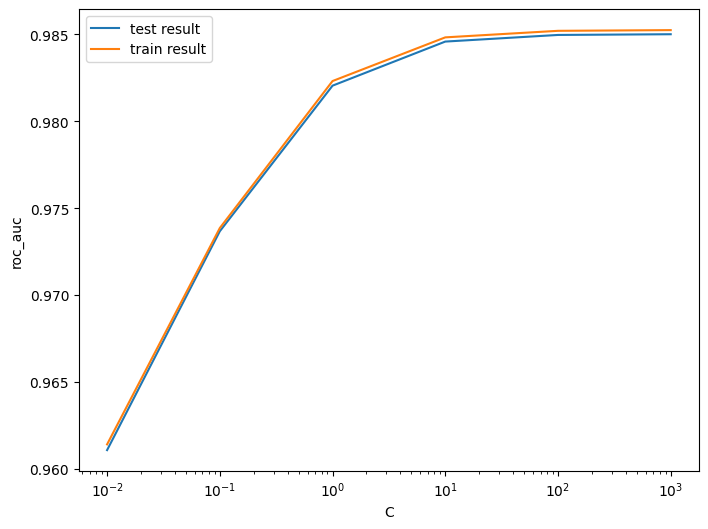

In [ ]:
# Plot of C versus traain and validation scores

plt.figure(figsize = (8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc = 'upper left')
plt.xscale('log')

In [ ]:
est_r = model_cv.best_estimator_
print(est_r.score(X_test_r, y_test_r))
# Best score with the best C
print('The highest test roc_auc is {0} at C = {1}'.format(model_cv.best_score_, model_cv.best_params_['C']))

0.9982613885068756
The highest test roc_auc is 0.9850132697942652 at C = 1000


In [ ]:
# LogisticRegression with best parametrs
# Instanciate the model with best C
logistic_r = LogisticRegression(C = 1000)

# Fit the model on the train set
model_r = logistic_r.fit(X_train_r, y_train_r)

# Prediction on train and test set
y_train_pred_r = model_r.predict(X_train_r)
y_test_pred_r = model_r.predict(X_test_r)



In [ ]:
# Confusion matrix
cm_train_r = confusion_matrix(y_train_r, y_train_pred_r)
cm_test_r = confusion_matrix(y_test_r, y_test_pred_r)
print(cm_train_r)
print(cm_test_r)

[[1933199     338]
 [   3000    2749]]
[[828515    144]
 [  1301   1163]]


In [ ]:
# Calcul de la précision
precision = precision_score(y_train_r, y_train_pred_r)
# Calcul du rappel
recall = recall_score(y_train_r, y_train_pred_r)
# Calcul de la F-mesure
f1 = f1_score(y_train_r, y_train_pred_r)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.8905085843861354
Rappel: 0.4781701165420073
F-mesure: 0.6222272521502943


In [ ]:
# classification_report
print(classification_report(y_train_r, y_train_pred_r))
print(classification_report(y_train_r, y_train_pred_r))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1933537
           1       0.89      0.48      0.62      5749

    accuracy                           1.00   1939286
   macro avg       0.94      0.74      0.81   1939286
weighted avg       1.00      1.00      1.00   1939286



In [ ]:
# ROC CURVE
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

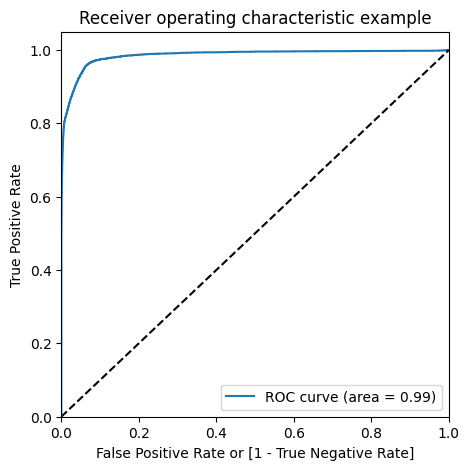

In [ ]:
# Predicted probqbility on train set
y_train_pred_proba_r = model_r.predict_proba(X_train_r)[:,1]

# Plot ROC curve
draw_roc(y_train_r, y_train_pred_proba_r)

In [ ]:
# Calcul de la précision
precision = precision_score(y_test_r, y_test_pred_r)
# Calcul du rappel
recall = recall_score(y_test_r, y_test_pred_r)
# Calcul de la F-mesure
f1 = f1_score(y_test_r, y_test_pred_r)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.8898240244835501
Rappel: 0.4719967532467532
F-mesure: 0.6168125165738532


In [ ]:
# classification_report
print(classification_report(y_test_r, y_test_pred_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.89      0.47      0.62      2464

    accuracy                           1.00    831123
   macro avg       0.94      0.74      0.81    831123
weighted avg       1.00      1.00      1.00    831123



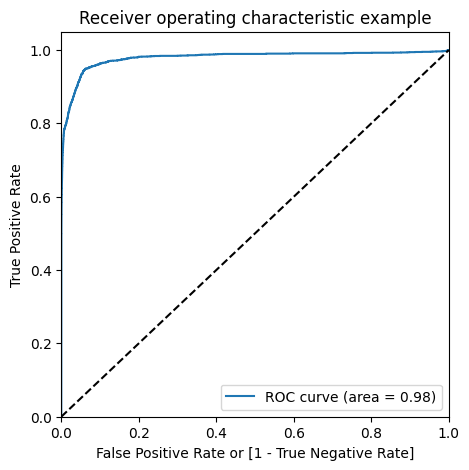

In [ ]:
# Predicted probqbility on train set
y_test_pred_proba_r = model_r.predict_proba(X_test_r)[:,1]
# Plot the ROC curve
draw_roc(y_test_r, y_test_pred_proba_r)

# **2. Test sur la base de données générées**




In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# Specify paraams
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheving the the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

# Fit the model
model_cv.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
print('Best score : ', model_cv.best_score_)
print('Best params :', model_cv.best_params_)
print('Best estimator : ', model_cv.best_estimator_)
# Sauvegarder les resultats sous forme d'un dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Best score :  0.8948357637264521
Best params : {'C': 0.01}
Best estimator :  LogisticRegression(C=0.01)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.670203,0.015772,0.061463,0.003767,0.01,{'C': 0.01},0.895341,0.892560,0.893139,0.895262,...,0.894836,0.001884,1,0.894725,0.895362,0.895270,0.894754,0.894159,0.894854,0.000434
1,0.691445,0.046709,0.060628,0.002416,0.1,{'C': 0.1},0.895130,0.892216,0.892825,0.895011,...,0.894562,0.001921,2,0.894446,0.895087,0.895002,0.894481,0.893888,0.894581,0.000434
2,0.657444,0.045260,0.054996,0.013315,1,{'C': 1},0.895105,0.892177,0.892791,0.894981,...,0.894531,0.001925,3,0.894413,0.895055,0.894971,0.894450,0.893856,0.894549,0.000434
3,0.355545,0.016757,0.030750,0.003008,10,{'C': 10},0.895103,0.892173,0.892787,0.894977,...,0.894528,0.001925,4,0.894410,0.895051,0.894967,0.894447,0.893853,0.894546,0.000434
4,0.355201,0.012168,0.031065,0.003147,100,{'C': 100},0.895102,0.892173,0.892787,0.894977,...,0.894527,0.001925,5,0.894409,0.895051,0.894967,0.894446,0.893853,0.894545,0.000434
5,0.364512,0.013504,0.028979,0.000744,1000,{'C': 1000},0.895102,0.892173,0.892787,0.894977,...,0.894527,0.001925,6,0.894409,0.895051,0.894967,0.894446,0.893853,0.894545,0.000434


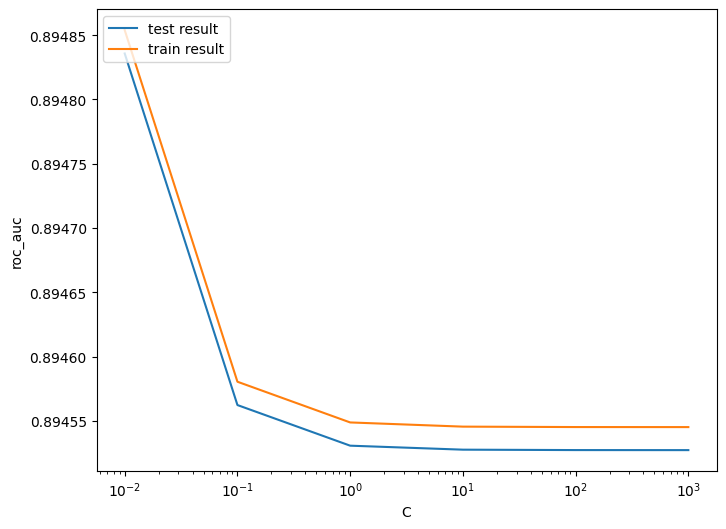

In [ ]:
# Plot of C versus traain and validation scores

plt.figure(figsize = (8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc = 'upper left')
plt.xscale('log')

In [ ]:
# Best score with the best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print('The highest test roc_auc is {0} at C = {1}'.format(best_score, best_C))

The highest test roc_auc is 0.8948357637264521 at C = 0.01


In [ ]:
# LogisticRegression with best params

# Instanciate the model with best C
logistic_s = LogisticRegression(C = 0.01)

# Fit the model on the train set
model_s = logistic_s.fit(X_train_s, y_train_s)

# Prediction on train and test set
y_train_pred_s = model_s.predict(X_train_s)
y_test_pred_s = model_s.predict(X_test_s)

In [ ]:
# Confusion matrix
cm_train_s = confusion_matrix(y_train_s, y_train_pred_s)
cm_test_s = confusion_matrix(y_test_s, y_test_pred_s)
print(cm_train_s)
print(cm_test_s)

[[135644   4356]
 [ 28217 105263]]
[[58107  1893]
 [12172 45034]]


In [ ]:
# Calcul de la précision
precision = precision_score(y_train_s, y_train_pred_s)
# Calcul du rappel
recall = recall_score(y_train_s, y_train_pred_s)
# Calcul de la F-mesure
f1 = f1_score(y_train_s, y_train_pred_s)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.9602623632764393
Rappel: 0.7886050344620917
F-mesure: 0.8660093213053118


In [ ]:
# classification_report
print(classification_report(y_train_s, y_train_pred_s))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89    140000
           1       0.96      0.79      0.87    133480

    accuracy                           0.88    273480
   macro avg       0.89      0.88      0.88    273480
weighted avg       0.89      0.88      0.88    273480



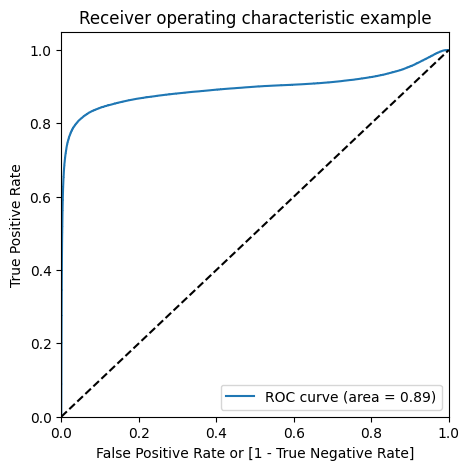

In [ ]:
# Predicted probqbility on train set
y_train_pred_proba_s = model_s.predict_proba(X_train_s)[:,1]
# Plot ROC curve
draw_roc(y_train_s, y_train_pred_proba_s)


In [ ]:
# Calcul de la précision
precision = precision_score(y_test_s, y_test_pred_s)
# Calcul du rappel
recall = recall_score(y_test_s, y_test_pred_s)
# Calcul de la F-mesure
f1 = f1_score(y_test_s, y_test_pred_s)

print("Précision:", precision)
print("Rappel:", recall)
print("F-mesure:", f1)

Précision: 0.9596607496750271
Rappel: 0.7872251162465476
F-mesure: 0.8649323461342706


In [ ]:
# classification_report
print(classification_report(y_test_s, y_test_pred_s))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     60000
           1       0.96      0.79      0.86     57206

    accuracy                           0.88    117206
   macro avg       0.89      0.88      0.88    117206
weighted avg       0.89      0.88      0.88    117206



In [ ]:
# Predicted probqbility on train set
y_test_pred_proba_s = model_s.predict_proba(X_test_s)[:,1]

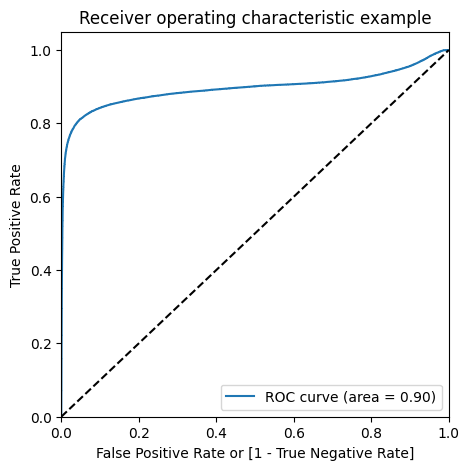

In [ ]:
# Plot the ROC curve
draw_roc(y_test_s, y_test_pred_proba_s)

In [ ]:
reel_data.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type
0,-0.049901,-0.173632,-0.106389,-0.403155,-0.379838,0,0,1
1,-0.099439,-0.148394,-0.106389,-0.403155,-0.389242,0,0,1
2,0.57771,-0.043116,-0.106389,0.055791,0.153942,0,0,0
3,-0.35686,-0.189568,-0.106389,-0.284669,-0.251163,0,0,1
4,1.001606,-0.189568,-0.106389,0.322843,0.475681,0,0,0


In [ ]:
reel_data.shape

(2770409, 8)

In [ ]:
reel_data.to_csv('reel_data.csv', index = False)